# Horn and Schunck Algorithm For Optical Flow

URL : http://datahacker.rs/013-optical-flow-using-horn-and-schunck-method/

In [2]:
import cv2

img1 = cv2.imread('mask1.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2= cv2.imread('mask2.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
import numpy as np

img1 = cv2.resize(img1, (640, 320))
img2 = cv2.resize(img2, (640, 320))

M = np.zeros((2,3), dtype = np.float32)

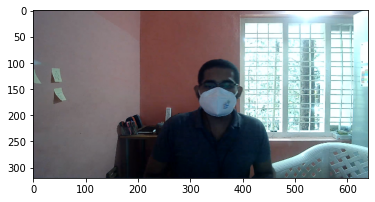

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img1)

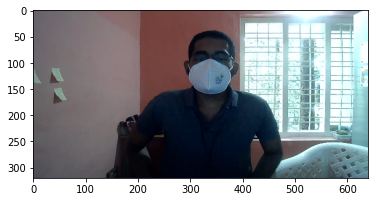

In [7]:
plt.imshow(img2)

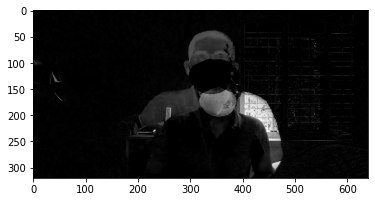

In [8]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap = 'gray')
plt.imshow(gray2, cmap = 'gray')

gray_diff = cv2.subtract(gray1, gray2)

plt.imshow(gray_diff, cmap = 'gray')

In [9]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 5, 15,  3,  5,  1.2, 0) 

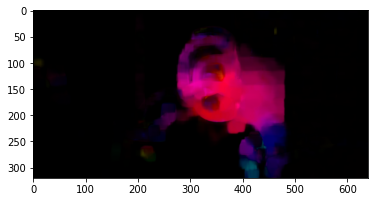

In [10]:
hsv = np.zeros( (320,640,3), dtype = np.uint8)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)